In [43]:
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException
import pickle as pkl
from pprint import pprint
import time

import matplotlib.pyplot as plt

In [5]:
with open('stadium_info.pkl', 'rb') as open_file:
    stadium_info_dict = pkl.load(open_file)

In [6]:
stadium_info_dict

{'Amex Stadium, Falmer': {'coords': 'Coordinates: 50°51′42.56″N 0°4′59.80″W',
  'capacity': 30750},
 'Anfield, Liverpool': {'coords': 'Coordinates 53°25′50.98″N 2°57′39.05″W\nCoordinates: 53°25′50.98″N 2°57′39.05″W',
  'capacity': 54074},
 'Bloomfield Road, Blackpool': {'coords': 'Coordinates 53°48′17″N 3°2′53″W',
  'capacity': 17338},
 'Boleyn Ground, London': {'coords': None, 'capacity': 35016},
 'Bramall Lane, Sheffield': {'coords': 'Coordinates 53°22′13″N 1°28′15″W\nCoordinates: 53°22′13″N 1°28′15″W',
  'capacity': 32702},
 'Britannia Stadium, Stoke': {'coords': None, 'capacity': 27740},
 'Cardiff City Stadium, Cardiff': {'coords': 'Coordinates 51°28′22″N 3°12′11″W\nCoordinates: 51°28′22″N 3°12′11″W',
  'capacity': 33280},
 'Carrow Road, Norwich': {'coords': 'Coordinates 52°37′19.66″N 1°18′31.15″E\nCoordinates: 52°37′19.66″N 1°18′31.15″E',
  'capacity': 27244},
 'Craven Cottage, London': {'coords': 'Coordinates 51°28′30″N 0°13′18″W\nCoordinates: 51°28′30″N 0°13′18″W',
  'capacity':

In [39]:
with open('PLmatches.csv', 'r') as open_file:
    df = pd.read_csv(open_file, index_col=0)

In [17]:
formatted_matchweek = df['matchweek'].apply(lambda y: y[10:])

In [22]:
df['matchweek'] = formatted_matchweek

In [25]:
df['matchweek'] = df['matchweek'].astype(int)

In [38]:
with open('PLmatches.csv', 'w') as open_file:
    df.to_csv(open_file)

In [31]:
stadium_series = df['match_stadium']

In [33]:
stadium_series = stadium_series.apply(lambda stadium: stadium_info_dict[stadium]['capacity'])

In [36]:
df['stadium_capacity'] = stadium_series

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4559 entries, 5567 to 22721
Data columns (total 43 columns):
hometeam_name            4559 non-null object
awayteam_name            4559 non-null object
home_goals               4559 non-null int64
away_goals               4559 non-null int64
match_date               4559 non-null object
match_timestamp          4559 non-null int64
match_referee            4559 non-null object
match_stadium            4559 non-null object
match_attendance         4013 non-null float64
home_possession          4559 non-null float64
away_possession          4559 non-null float64
home_shotsontarget       4559 non-null int64
away_shotsontarget       4559 non-null int64
home_shots               4559 non-null int64
away_shots               4559 non-null int64
home_touches             4559 non-null int64
away_touches             4559 non-null int64
home_passes              4559 non-null int64
away_passes              4559 non-null int64
home_tackles           

In [41]:
df_Sund = df[df['hometeam_name'] == 'Sunderland']

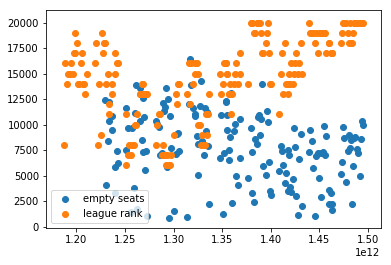

In [56]:
plt.scatter(df_Sund['match_timestamp'], df_Sund['stadium_capacity'] - df_Sund['match_attendance'], label = 'empty seats')
plt.scatter(df_Sund['match_timestamp'], 1000*df_Sund['home_leaguerank'], label='league rank')
plt.legend()

In [51]:
df_Sund['match_stadium'].unique()

array(['Stadium of Light, Sunderland'], dtype=object)

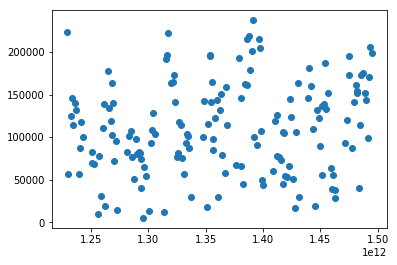

In [52]:
plt.scatter(df_Sund['match_timestamp'], df_Sund['home_leaguerank']*(df_Sund['stadium_capacity'] - df_Sund['match_attendance']))